In [1]:
get_ipython().magic('matplotlib inline')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
sns.set_style('white')
sns.set_context('notebook')
from backward_selection import backward_selected
from forward_selection import forward_selected


data = pd.read_excel('caschool.xlsx.xls')

state=440232650+470353886+470352982 # sum of the student IDs for the members of the group

train = data.sample(frac=0.8, random_state=state) # For tasks 1-5 
test = data[data.index.isin(train.index)==False].copy() # Only for prediction (task 6)

train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

In [26]:
cols = ['enrl_tot', 'teachers', 'calw_pct', 'meal_pct', 'computer', 'testscr', 'comp_stu', 'expn_stu', 'str', 'avginc', 'el_pct']

In [27]:
model = backward_selected(train[cols], 'testscr')

adj_r2 if all variables included: 0.819307
Testing formula: testscr ~ meal_pct + calw_pct + el_pct + expn_stu + comp_stu + computer + teachers + str + enrl_tot + 1
Testing formula: testscr ~ avginc + calw_pct + el_pct + expn_stu + comp_stu + computer + teachers + str + enrl_tot + 1
Testing formula: testscr ~ avginc + meal_pct + el_pct + expn_stu + comp_stu + computer + teachers + str + enrl_tot + 1
Testing formula: testscr ~ avginc + meal_pct + calw_pct + expn_stu + comp_stu + computer + teachers + str + enrl_tot + 1
Testing formula: testscr ~ avginc + meal_pct + calw_pct + el_pct + comp_stu + computer + teachers + str + enrl_tot + 1
Testing formula: testscr ~ avginc + meal_pct + calw_pct + el_pct + expn_stu + computer + teachers + str + enrl_tot + 1
Testing formula: testscr ~ avginc + meal_pct + calw_pct + el_pct + expn_stu + comp_stu + teachers + str + enrl_tot + 1
Testing formula: testscr ~ avginc + meal_pct + calw_pct + el_pct + expn_stu + comp_stu + computer + str + enrl_tot + 1
T

In [4]:
f_model = forward_selected(train[cols], 'testscr')

Testing formula: testscr ~ avginc + 1
Testing formula: testscr ~ gr_span + 1
Testing formula: testscr ~ meal_pct + 1
Testing formula: testscr ~ calw_pct + 1
Testing formula: testscr ~ el_pct + 1
Testing formula: testscr ~ expn_stu + 1
Testing formula: testscr ~ comp_stu + 1
Testing formula: testscr ~ computer + 1
Testing formula: testscr ~ teachers + 1
Testing formula: testscr ~ str + 1
Testing formula: testscr ~ enrl_tot + 1
adding meal_pct increases adj_r2 from 0.000000 to 0.771522
Testing formula: testscr ~ meal_pct + avginc + 1
Testing formula: testscr ~ meal_pct + gr_span + 1
Testing formula: testscr ~ meal_pct + calw_pct + 1
Testing formula: testscr ~ meal_pct + el_pct + 1
Testing formula: testscr ~ meal_pct + expn_stu + 1
Testing formula: testscr ~ meal_pct + comp_stu + 1
Testing formula: testscr ~ meal_pct + computer + 1
Testing formula: testscr ~ meal_pct + teachers + 1
Testing formula: testscr ~ meal_pct + str + 1
Testing formula: testscr ~ meal_pct + enrl_tot + 1
adding avgi

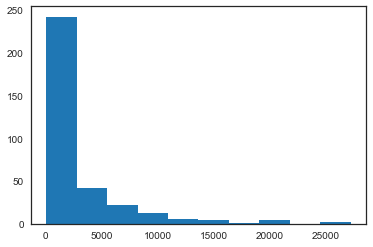

In [5]:
plt.hist(train['enrl_tot'])
plt.show()

In [6]:
train['enrl_tot'].quantile(.333);

In [7]:
 train['enrl_tot'].quantile(.666)

2277.9400000000005

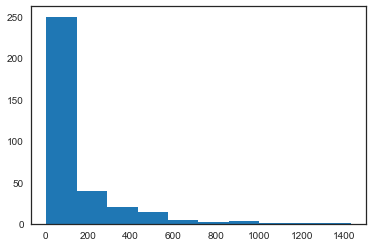

In [8]:
plt.hist(train['teachers'])
plt.show()

In [9]:
train['teachers'].quantile(.333)

26.428800067901612

In [10]:
train['teachers'].quantile(.666)

114.03300033569336

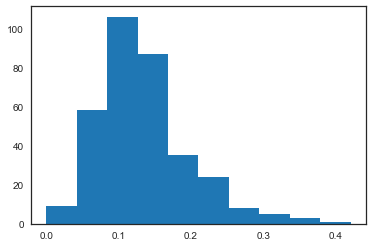

In [11]:
plt.hist(train['comp_stu'])
plt.show()

In [12]:
train['round_comp_stu'] = train['comp_stu'].round(1)
train['round_comp_stu'].head()

0    0.2
1    0.0
2    0.1
3    0.2
4    0.2
Name: round_comp_stu, dtype: float64

ValueError: range parameter must be finite.

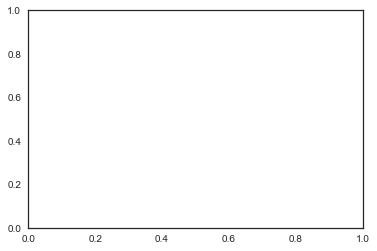

In [45]:

plt.hist(train['comp_stu'].apply(np.log))
plt.show()

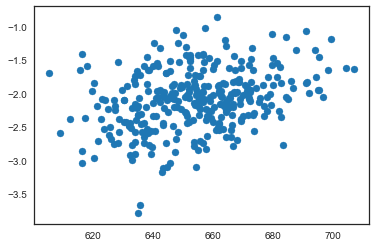

In [29]:
plt.scatter(train['testscr'], train['comp_stu'].apply(np.log))
plt.show()

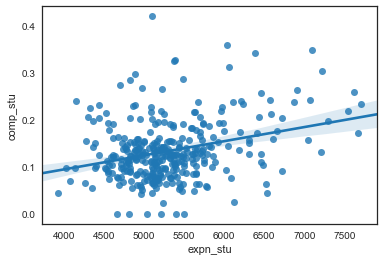

In [36]:
sns.regplot(train['expn_stu'], train['comp_stu'])
plt.show()

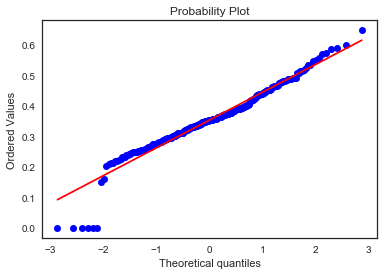

In [25]:
from scipy import stats
stats.probplot(train['comp_stu']**0.5, plot=plt)
plt.show()

In [ ]:
*